## RNN 기온예측모델

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. 데이터 로드
file_path = "dataset/jena_climate_2009.csv"
data = pd.read_csv(file_path)

# 데이터 확인
# Date Time: 관측 날짜 및 시간. p (mbar): 기압. T (degC): 기온, Tpot (K): 잠재온도
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
print("data.shape:",data.shape)

# T (degC) : 기온
temperature = data['T (degC)'].values ## 시간에 따른 기온변화를 예측

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 정규화 # 0~1 사이의 수로 정규화하는 스케일러
scaled_data = scaler.fit_transform(temperature.reshape(-1, 1)) # 해당 스케일러로 기온데이터 정규화
# reshape(-1, 1) : -1행 1열?
# reshape에 -1을 준다는 것은 해당 값에 제한을 주지 않겠다는 의미
# 즉, 해당 코드에서는 다행일렬로 정렬한다는 의미

# 데이터셋 생성 함수 : look_back(sequence length와 같은 의미)
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back): # 받은 데이터셋의 길이(행의 수)에서 60을 뺀 만큼만 반복(21683번)
        X.append(dataset[i:i + look_back, 0]) # 0번째 열(기록시간)의 i부터 i+60만큼의 데이터리스트를 X리스트에 추가
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # 과거 60시간 데이터를 기반으로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # RNN 입력 형태

print("X.shape:",X.shape)

# 데이터 분리
train_size = int(len(X) * 0.8)  # 80% 학습 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    # 50(뉴런 즉 메모리유닛수), return_sequence=False(마지막시점 출력만 반환)
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

data.shape: (21743, 15)
X.shape: (21683, 60, 1)
Epoch 1/20


c:\NEWTEST\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0073 - val_loss: 2.4454e-04
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.5333e-04 - val_loss: 2.6121e-04
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.1513e-04 - val_loss: 1.2523e-04
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.0657e-05 - val_loss: 8.3862e-05
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3437e-05 - val_loss: 1.7545e-04
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.7783e-05 - val_loss: 6.1419e-05
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.6647e-05 - val_loss: 8.6981e-05
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.4456e-05 - val_loss: 7.3808e-05
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.6176e-05 - val_loss: 5.8271e-05
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.8309e-05 - val_loss: 5.3491e-05
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.5948e-05 - 

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


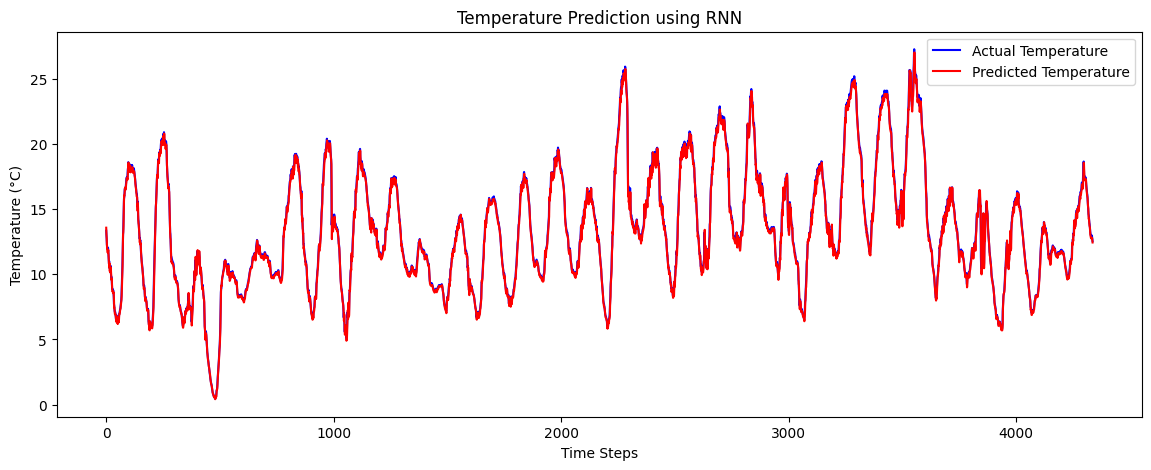

In [ ]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 정규화 처리된 예측값을 복원
# inverse_transform 해당 스케일러의 역처리를 시행
# scaler = MinMaxScaler(feature_range=(0, 1))

# 실제 값 복원
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))
# 정규화 처리된 실제값도 복원

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_values, label="Actual Temperature", color='blue')
plt.plot(predictions, label="Predicted Temperature", color='red')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

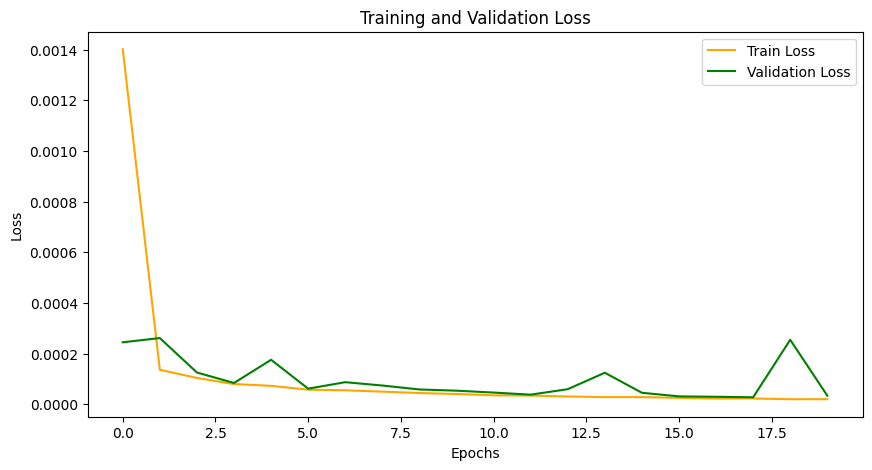

In [4]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 주가예측모델 (LSTM)

In [7]:
%pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 10.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=0f8044a46261bc532408406e34219c6add545de70e6d99274e8dae190af7bee7
  Stored in directory: c:\users\humna-20\appdata\local\pip\cache\wheels\fd\fd\5e\90b9ec95da4fd6c96237b580ce74f89d6bdea547ad151ab5f4
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [8]:
# 증권데이터 수집 라이브러리 설치 :  pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. 데이터 수집
ticker = "AAPL"  # 예: 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가만 사용

data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.320433
2015-01-05,23.635281
2015-01-06,23.637516
2015-01-07,23.968962
2015-01-08,24.889902


c:\NEWTEST\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0475 - val_loss: 0.0031
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.4180e-04 - val_loss: 0.0015
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.2417e-04 - val_loss: 0.0014
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.8484e-04 - val_loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.8256e-04 - val_loss: 0.0014
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.4892e-04 - val_loss: 0.0015
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.4729e-04 - val_loss: 0.0012
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.7471e-04 - val_loss: 0.0013
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.4157e-04 - val_loss: 0.0012
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.9645e-04 - val_loss: 0.0013
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.5014e-04 - val_loss: 0.0012
Epoch 12/20
56/56 ━━━━━

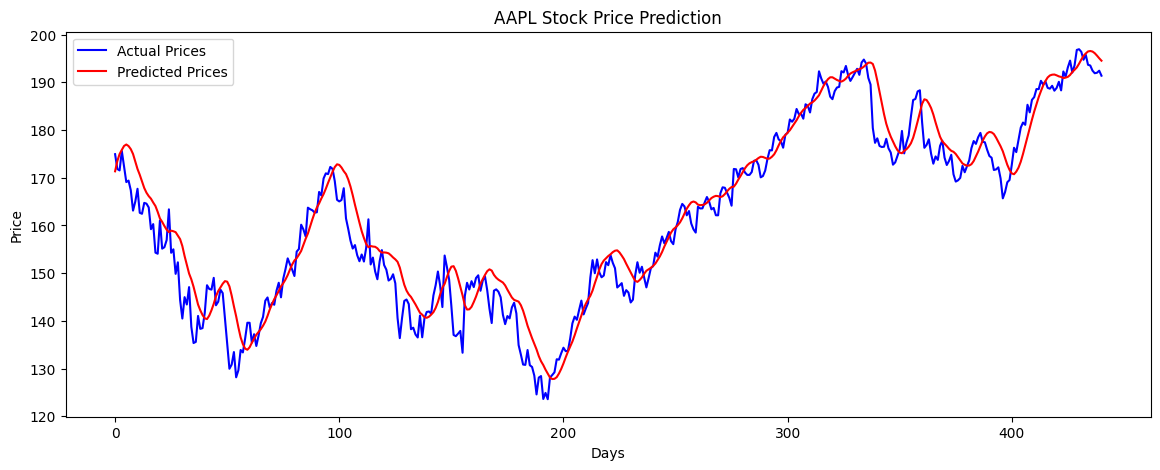

In [9]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM 입력 형태

# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\NEWTEST\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0456 - val_loss: 5.6468e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.1284e-04 - val_loss: 5.4297e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6433e-04 - val_loss: 6.1083e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.5793e-04 - val_loss: 4.6111e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.4713e-04 - val_loss: 4.3745e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.2367e-04 - val_loss: 4.4521e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.2627e-04 - val_loss: 4.1287e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.1826e-04 - val_loss: 8.7969e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.9502e-04 - val_loss: 4.0384e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.1569e-04 - val_loss: 3.6328e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.3313e-04 - val_loss: 4

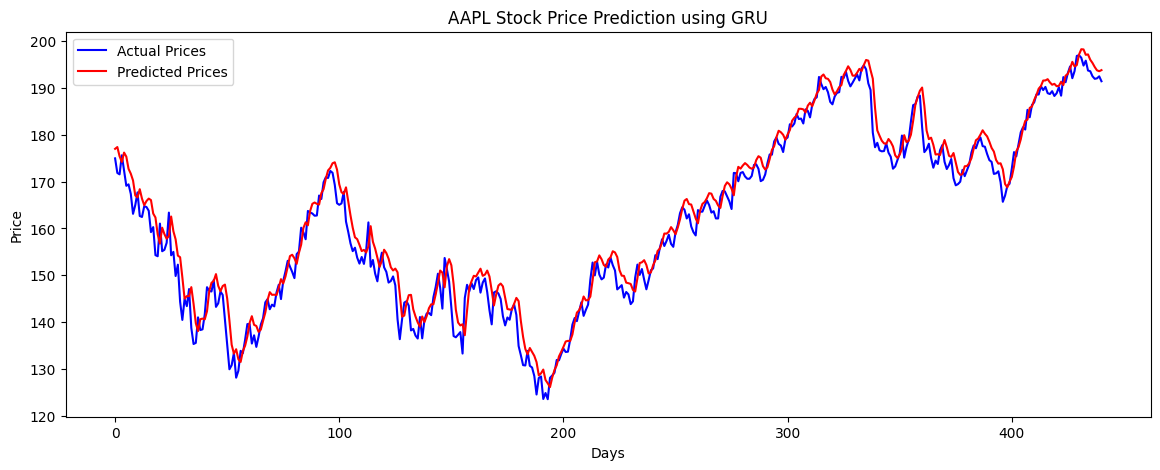

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# 1. 데이터 수집
ticker = "AAPL"  # 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가 데이터만 사용

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 데이터를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

# GRU 모델에 적합한 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # GRU 입력 형태

# 3. GRU 모델 구성
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    # 모델만  LSTM에서 GRU로 바뀜
    GRU(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. 모델 학습
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 정규화 복원

# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
## 해당 자료에서는 GRU가 LSTM보다 비교적 예측이 정확함

## 항공기 탑승객 수요 예측 (LSTM)

In [11]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 불러오기
data_path = 'dataset/airline.csv'  # 데이터 경로
df = pd.read_csv(data_path)

# 데이터 확인
print(df.head())

         date  count
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121


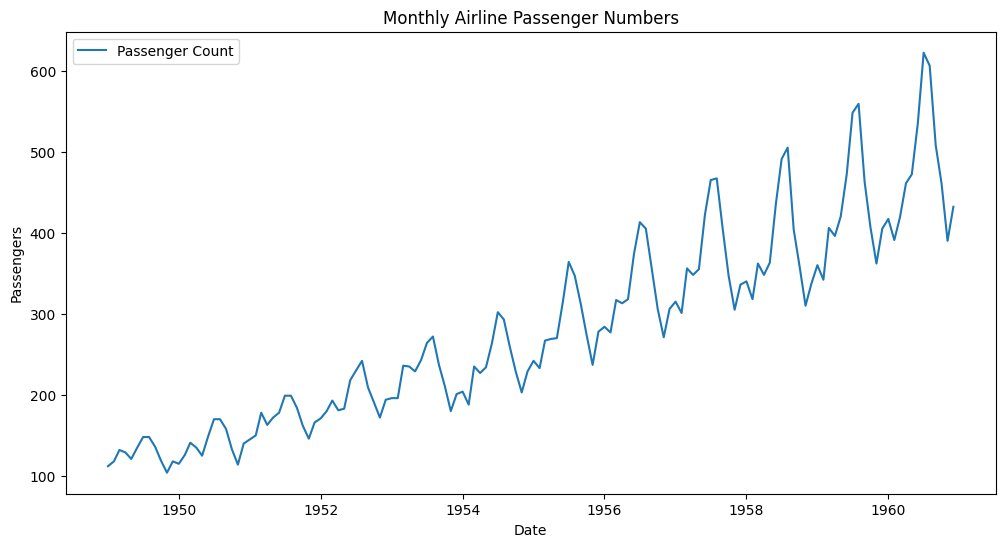

In [12]:
# 날짜(Date)와 탑승객 수(count) 열의 이름 설정 및 변환
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['count'], label='Passenger Count')
plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [13]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['count']])

# 데이터셋 분리 (학습 데이터와 테스트 데이터)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 시계열 데이터셋 생성 함수
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 12  # 12개월 단위로 예측
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# LSTM 입력에 맞게 데이터 형태 변경
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM 모델 생성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\NEWTEST\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0591 - val_loss: 0.0557
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0101 - val_loss: 0.0290
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0188 - val_loss: 0.0272
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0076 - val_loss: 0.0566
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0092 - val_loss: 0.0516
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0084 - val_loss: 0.0270
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069 - val_loss: 0.0236
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072 - val_loss: 0.0248
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0068 - val_loss: 0.0325
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - val_loss: 0.0254
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0062 - val_loss: 0.0249
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0067 - val_loss: 0.0243
Epoch 13/50

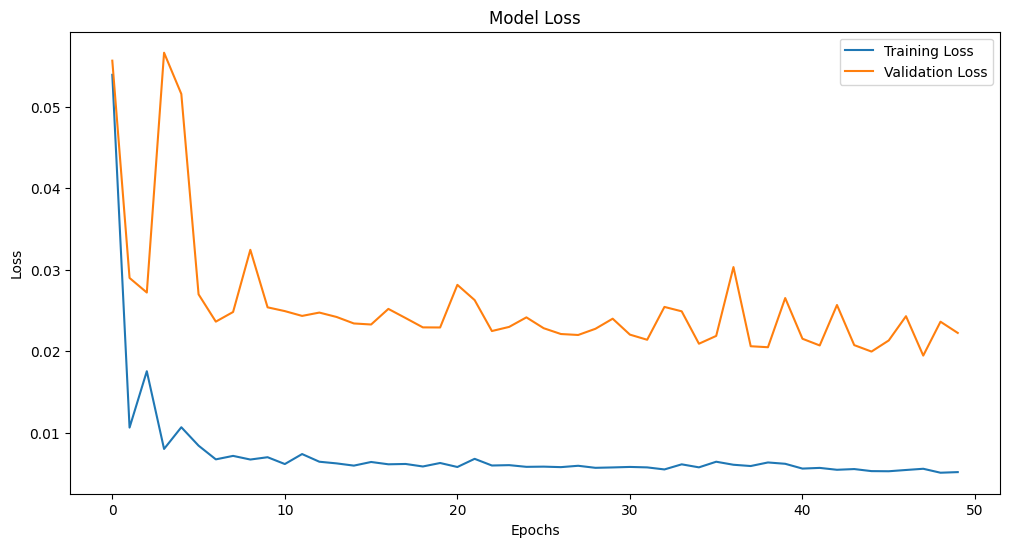

In [14]:
# 학습 과정 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


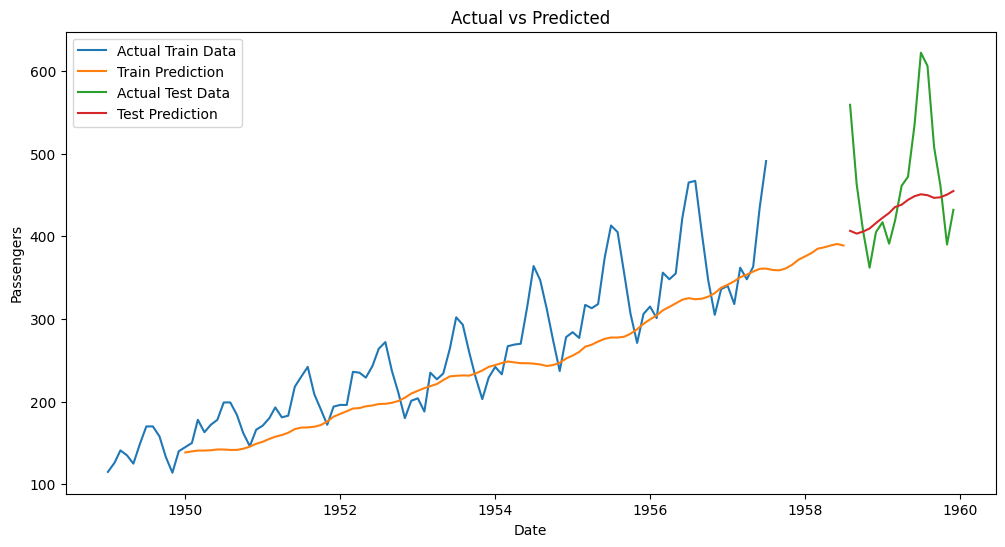

In [15]:
# 테스트 데이터 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값 역정규화
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(y_train)], y_train, label='Actual Train Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], y_test, label='Actual Test Data')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], test_predict, label='Test Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 자전거 대여량 예측 (GRU)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
dataset_path = './dataset/'
train_data = pd.read_csv(dataset_path + 'train.csv') # 학습데이터
test_data = pd.read_csv(dataset_path + 'test.csv') # 평가데이터

# 2. 데이터 전처리
def preprocess_data(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    # datetime 컬럼의 값 타입을 시간형태로 변경하고
    # datetime 컬럼에 할당
    data['hour'] = data['datetime'].dt.hour
    data['day'] = data['datetime'].dt.day
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year
    # 각 컬럼에 해당 시간을 할당

    data = data.drop(['datetime', 'casual', 'registered'], axis=1, errors='ignore')
    # datetime, casual, registered 컬럼을 제외시킴
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Feature와 Target 분리
X = train_data.drop(['count'], axis=1).values
y = train_data['count'].values.reshape(-1, 1)

# MinMaxScaler를 사용하여 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Train/Test 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 차원 조정 (GRU 입력 형태로 변환)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# 4. GRU 모델 생성
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 5. 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


c:\NEWTEST\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0332 - val_loss: 0.0281
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0289 - val_loss: 0.0269
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0282 - val_loss: 0.0249
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0254 - val_loss: 0.0225
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0226 - val_loss: 0.0202
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0205 - val_loss: 0.0223
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0189 - val_loss: 0.0166
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0165 - val_loss: 0.0148
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0158 - val_loss: 0.0140
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 12/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0

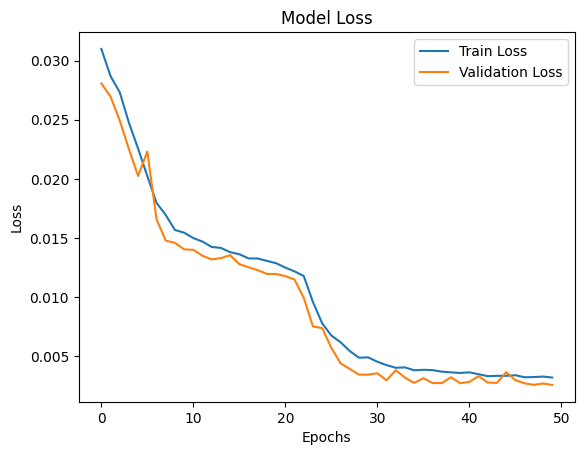

In [17]:
# 6. 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# 7. 테스트 데이터 예측
X_test = scaler_X.transform(test_data.values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

# 결과 저장
test_data['predicted_count'] = y_pred
test_data.to_csv(dataset_path + 'test_predictions.csv', index=False)
print("예측 결과가 'test_predictions.csv'로 저장되었습니다.")

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
예측 결과가 'test_predictions.csv'로 저장되었습니다.


In [22]:
test_predictions_data = pd.read_csv(dataset_path + 'test_predictions.csv')
test_predictions_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,predicted_count
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011,11.907359
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011,8.404287
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011,2.752365
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011,-0.269607
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011,1.179860
